In [1]:
import pandas as pd
import jieba.posseg as pseg
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import re
from stopwordsiso import stopwords as swiso
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud

In [2]:
# Load the dataset
data = pd.read_csv("Weibo_1215.csv")

In [4]:
# Integrating stopwordsiso with your custom stopwords list
stpw_s = swiso("zh")
custom_stopwords = {"的", "了", "在", "是", "我", "有", "和", "就", 
                    "不", "人", "都", "一", "一个", "上", "也", "很", "到", 
                    "说", "要", "去", "你", "会", "着", "没有", "看", "好", 
                    "自己", "这","微","博", "原图", "视频","组图","cn", "http"}
# Combine both stopwords sets
stopwords = stpw_s.union(custom_stopwords)

# Specify the allowed flags (part-of-speech tags)
flags = ('n', 'nr', 'ns', 'nt', 'a', 'v', 'd')

def clean_text(text):
    # Use POS tagging for each word in the text
    words_flag = [(w.word, w.flag) for w in pseg.cut(text)]
    # Filter words based on POS tags and stopwords, also remove numbers
    cleaned_words = [word for word, flag in words_flag if flag in flags and word not in stopwords and not re.search(r'\d', word)]
    
    return cleaned_words


In [5]:
weibo = data[data['IP_May'].isin(["Shanghai", "Anhui", "Chongqing", "Guizhou", "Hainan", 
                                  "Henan", "Hunan", "Jiangxi", "Zhejiang", "Shanxi", 
                                  "Sichuan", "Hubei", "Ningxia", "Qinghai", "Tibet", 
                                  "Xinjiang", "Yunnan"])]

# Select columns and remove duplicates
weibo = weibo[['date', 'content_cleaned']].drop_duplicates()

# Convert 'date' to datetime format and calculate the 'week' number
weibo['week'] = weibo['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()[1] - 1)


In [6]:
#weibo_week_13 = weibo[(weibo['week'] == 10) | (weibo['week'] == 11)]


#weibo_week = weibo[weibo['week'] == 12]

weibo_week = weibo[(weibo['week'] == 10) | (weibo['week'] == 11) | (weibo['week'] == 12)]

In [7]:
weibo_week

,date,content_cleaned,week
23,2022-04-01,南京 新增 一 例 新冠 肺炎 病毒 感染者 看 了 一下 还是 四川 人民 骂人 硬是 厉...,12
24,2022-03-29,浦东 疫情 华亭 宾馆 发现 疫情 时 果断 采取 封控 措施 的话 何至于此 开始 仙 各...,12
25,2022-03-26,为 MU5735 遇难者 默哀 MU5735 航班 上 人员 已 全部 遇难 原图 赞 11...,11
26,2022-03-22,离婚 冷静期 内 离婚 不成 先 立 遗嘱 为什么 网友 特别 是 女 网友 对 离婚 冷静...,11
27,2022-03-18,穿 露腿 裤坐 地铁 引发 的 社死 看不惯 可以 不 看 上手 几 个 意思 啊,10
...,...,...,...
416227,2022-03-26,科普 如果 不 限制 飞行 高度 飞机 可以 飞往 外 太空 吗 科普 韦观 Pro 的 微...,11
416228,2022-03-26,俄 称 美 在 转移 各方 对 其 在 乌 生物 实验室 的 注意 紧急 转移 紧急 删除 ...,11
416229,2022-03-25,建议 老百姓 知晓 的 9 个 中成药 好用 不 贵 1 尿路 感染 小便 疼痛 收好 热淋...,11
416230,2022-03-18,美版 知乎 上 有 这样 一个 提问 为什么 外国人 觉得 住 在 中国 很 舒服 看看 国...,10


In [104]:
texts = weibo_week['content_cleaned'].apply(clean_text)

In [105]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]


In [106]:
num_topics=1

In [107]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

In [108]:
# 打印所有主题，每个主题显示100个词
result=pd.DataFrame(lda.show_topics(num_topics=num_topics, num_words=100, log=False, formatted=False))
frame=[]
for i in range(num_topics):
    frame.append(pd.DataFrame(result[1][i],columns=[f'topic {i+1}',f'topic {i+1} value']))
topic_result = pd.concat(frame,axis=1)
topic_result.to_csv(f'{week101112.csv',encoding="utf-8-sig",index=False)


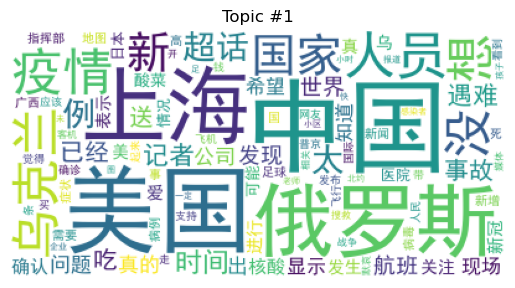

In [63]:

plt.figure()
plt.imshow(WordCloud(background_color="white",
font_path='simhei.ttf').fit_words(dict(lda.show_topic(0, 100))))
plt.axis("off")
plt.title("Topic #" + str(1))
plt.show()

In [75]:
len(topic_dict)

100

In [127]:
topic_data = pd.read_csv('Week 10-11.csv')

topic_dict = pd.Series(topic_data.iloc[:, 1].values, index=topic_data.iloc[:, 0]).to_dict()

wordcloud_cn = WordCloud(
    background_color="white",
    font_path='simhei.ttf',  # Ensure this font path is correct
    width=400,
    height=400
).fit_words(topic_dict)


In [128]:
# (ChatGPT)Translate the Chinese version of 'Week 10-11.csv' to 'Week 10-11_EN.csv'

topic_data1 = pd.read_csv('Week 10-11_EN.csv')

topic_dict = pd.Series(topic_data1.iloc[:, 1].values, index=topic_data1.iloc[:, 0]).to_dict()

wordcloud_en = WordCloud(
    background_color="white",
    font_path='arial',  # Ensure this font path is correct
    width= 400,
    height=400
).fit_words(topic_dict)


In [9]:
topic_data1 = pd.read_csv('Week 12_EN.csv')

topic_dict = pd.Series(topic_data1.iloc[:, 1].values, index=topic_data1.iloc[:, 0]).to_dict()

wordcloud_12 = WordCloud(
    background_color="white",
    font_path='arial',  # Ensure this font path is correct
    width= 400,
    height=400
).fit_words(topic_dict)


In [10]:
topic_data1 = pd.read_csv('Week 13_EN.csv')

topic_dict = pd.Series(topic_data1.iloc[:, 1].values, index=topic_data1.iloc[:, 0]).to_dict()

wordcloud_13 = WordCloud(
    background_color="white",
    font_path='arial',  # Ensure this font path is correct
    width= 400,
    height=400
).fit_words(topic_dict)


In [12]:
topic_data1 = pd.read_csv('Week 14 -15_EN.csv')

topic_dict = pd.Series(topic_data1.iloc[:, 1].values, index=topic_data1.iloc[:, 0]).to_dict()

wordcloud_14_15 = WordCloud(
    background_color="white",
    font_path='arial',  # Ensure this font path is correct
    width= 400,
    height=400
).fit_words(topic_dict)


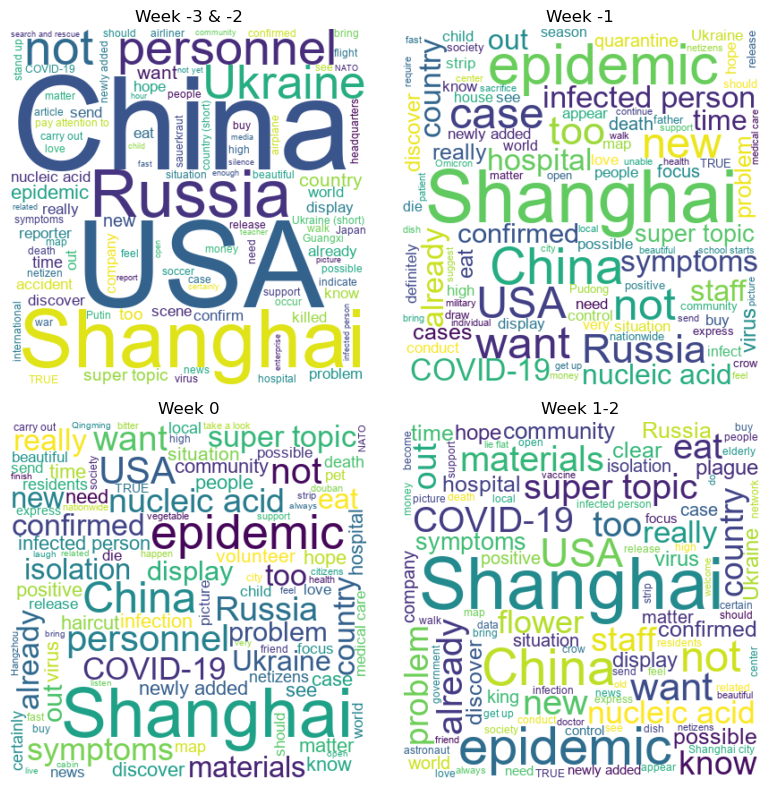

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # 1 row, 2 columns

axs[0][0].imshow(wordcloud_10_11, interpolation='bilinear')
axs[0][0].axis('off')
axs[0][0].set_title('Week -3 & -2')


axs[0][1].imshow(wordcloud_12, interpolation='bilinear')
axs[0][1].axis('off')
axs[0][1].set_title('Week -1')

axs[1][0].imshow(wordcloud_13, interpolation='bilinear')
axs[1][0].axis('off')
axs[1][0].set_title('Week 0')


axs[1][1].imshow(wordcloud_14_15, interpolation='bilinear')
axs[1][1].axis('off')
axs[1][1].set_title('Week 1-2')

plt.tight_layout()
plt.savefig("ALL.png")
plt.show()